In [1]:
pip install osmnx geopandas folium numpy pandas

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [4]:
!pip install numpy==1.22.4
!pip install --upgrade scipy

  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\anac\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [7]:
import osmnx as ox
import geopandas as gpd
import folium
import numpy as np
import pandas as pd
import random
import time

C:\Users\hi\AppData\Local\Temp\ipykernel_24752\1501237922.py:6: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')
C:\Users\hi\AppData\Local\Temp\ipykernel_24752\1501237922.py:6: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')


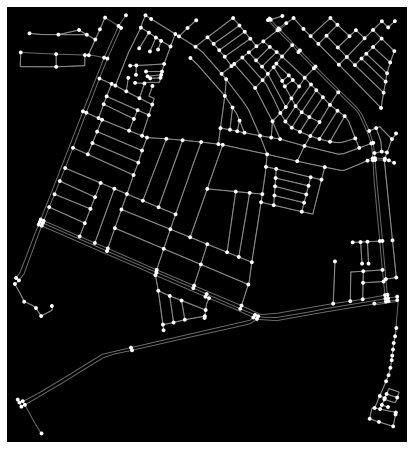

In [17]:
import matplotlib.pyplot as plt

north, south, east, west = 12.935, 12.920, 77.634, 77.620

graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')

fig, ax = ox.plot_graph(graph, bgcolor='k', node_color='w', node_size=15, edge_color='#999999', edge_linewidth=1, edge_alpha=0.7)
plt.show()

In [18]:
edges = ox.graph_to_gdfs(graph, edges=True)

C:\Users\hi\AppData\Local\Temp\ipykernel_24752\267551795.py:8: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')
C:\Users\hi\AppData\Local\Temp\ipykernel_24752\267551795.py:8: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')


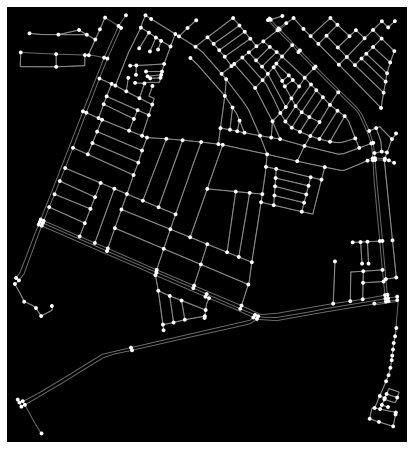

                              length
u         v          key            
254920166 254920223  0    137.544123
          1615723287 0     13.669284
          308918179  0     61.662981
254920223 17327139   0     51.300797
          1625402539 0     12.584506


In [22]:
north, south, east, west = 12.935, 12.920, 77.634, 77.62graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)
utm_crs = 'EPSG:32643'
edges = edges.to_crs(utm_crs)

edges['length'] = edges.geometry.length 

segments = edges[edges['length'] < 1000]

fig, ax = ox.plot_graph(graph, bgcolor='k', node_color='w', node_size=15, edge_color='#999999', edge_linewidth=1, edge_alpha=0.7)
plt.show()

print(segments[['length']].head())

In [23]:
import geopandas as gpd

edges['length'] = edges.geometry.length
segments = edges[edges['length'] < 1000]

In [24]:
import random

def simulate_gps_data(segments, num_samples=10):
    gps_data = []
    for _ in range(num_samples):
        segment = segments.sample(1)
        length = segment['length'].values[0]
        point = segment.geometry.values[0].interpolate(random.uniform(0, 1))
        gps_data.append((point.y, point.x, length))
    return gps_data

simulated_gps = simulate_gps_data(segments, num_samples=20)

In [25]:
def calculate_eta(gps_data, average_speed=30):
    eta_data = []
    for lat, lon, length in gps_data:
        time_seconds = (length / 1000) / (average_speed / 3600)
        eta_data.append((lat, lon, time_seconds))
    return eta_data

eta_predictions = calculate_eta(simulated_gps)

In [27]:
import folium
m = folium.Map(location=[12.9352, 77.6243], zoom_start=14)
for lat, lon, eta in eta_predictions:
    folium.Marker(location=[lat, lon], popup=f"ETA: {eta:.2f} seconds").add_to(m)
m

In [30]:
north, south, east, west = 12.935, 12.920, 77.634, 77.620

graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')

nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

utm_crs = 'EPSG:32643'
edges = edges.to_crs(utm_crs)

edges['length'] = edges.geometry.length

segments = edges[edges['length'] < 1000]
def simulate_vehicle_movement(segments, speed_kmh=30):
    speed_mps = speed_kmh / 3.6    
    current_segment = segments.sample(1).iloc[0]
    current_length = current_segment['length']    
    position = 0  
    
    while position < current_length:
        remaining_length = current_length - position
        eta = remaining_length / speed_mps 
        
        position += speed_mps  
        print(f"Current Position: {position:.2f} m, ETA: {eta:.2f} seconds")
        time.sleep(1) 

    print("Reached the end of the segment!")

simulate_vehicle_movement(segments)

C:\Users\hi\AppData\Local\Temp\ipykernel_24752\2689373345.py:4: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')
C:\Users\hi\AppData\Local\Temp\ipykernel_24752\2689373345.py:4: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')


Current Position: 8.33 m, ETA: 7.10 seconds
Current Position: 16.67 m, ETA: 6.10 seconds
Current Position: 25.00 m, ETA: 5.10 seconds
Current Position: 33.33 m, ETA: 4.10 seconds
Current Position: 41.67 m, ETA: 3.10 seconds
Current Position: 50.00 m, ETA: 2.10 seconds
Current Position: 58.33 m, ETA: 1.10 seconds
Current Position: 66.67 m, ETA: 0.10 seconds
Reached the end of the segment!
